# Random Forest Classifier with Breast Cancer Wisconsin Dataset
This notebook demonstrates how to use a Random Forest algorithm on the Breast Cancer Wisconsin dataset. We will cover:
- Loading and exploring the dataset
- Training a Random Forest classifier
- Visualizing feature importance
- Comparing performance with a single decision tree

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Breast Cancer Dataset
The Breast Cancer Wisconsin dataset contains features computed from digitized images of fine needle aspirate (FNA) of breast masses.

In [2]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Split the Data
We split the data into training and testing sets to evaluate the model's performance.

In [3]:
# Split the data
X = df[data.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
We train a Random Forest classifier on the training data.

In [4]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Feature Importance
Random forests can estimate the importance of each feature in making predictions. Let's visualize the feature importances.

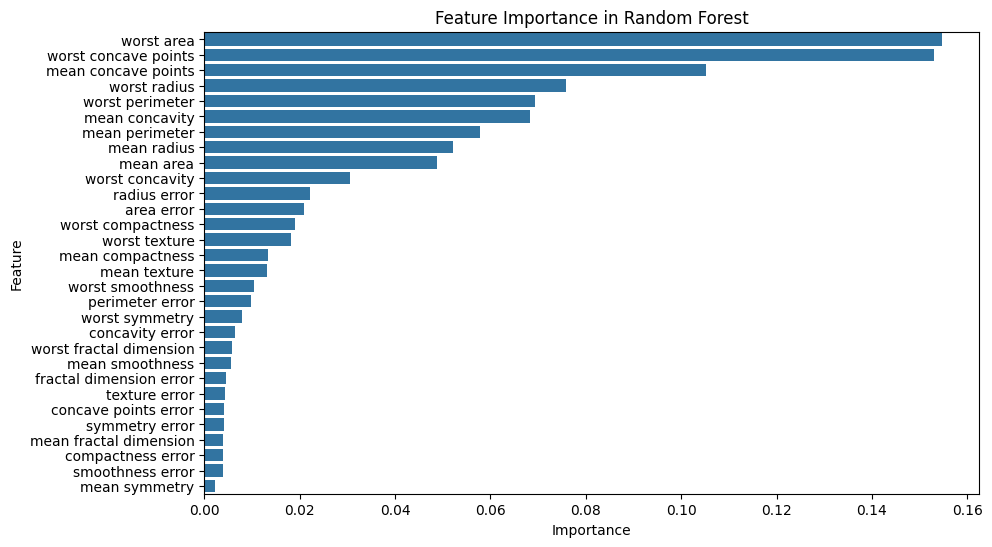

In [5]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model Evaluation
Evaluate the model's performance on the test set.

In [6]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Compare with a Single Decision Tree
Let's compare the performance of the Random Forest with a single Decision Tree classifier.

In [7]:
# Train and evaluate a single Decision Tree
single_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

Decision Tree Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

